# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [445]:
# Load pickled data
import pickle

training_file = './data/train.p'
validation_file= './data/valid.p'
testing_file = './data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print('loaded')

loaded


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [446]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import pandas as pd
import numpy as np


n_train = X_train.shape[0]
n_test = X_test.shape[0]
image_shape = X_train.shape[1:]

all_y_data = []
all_y_data.append(y_train)
all_y_data.append(y_valid)
all_y_data.append(y_test)

#n_classes = pd.Series(all_y_data).nunique()
n_classes = len(np.bincount(y_train) != 0)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)



Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

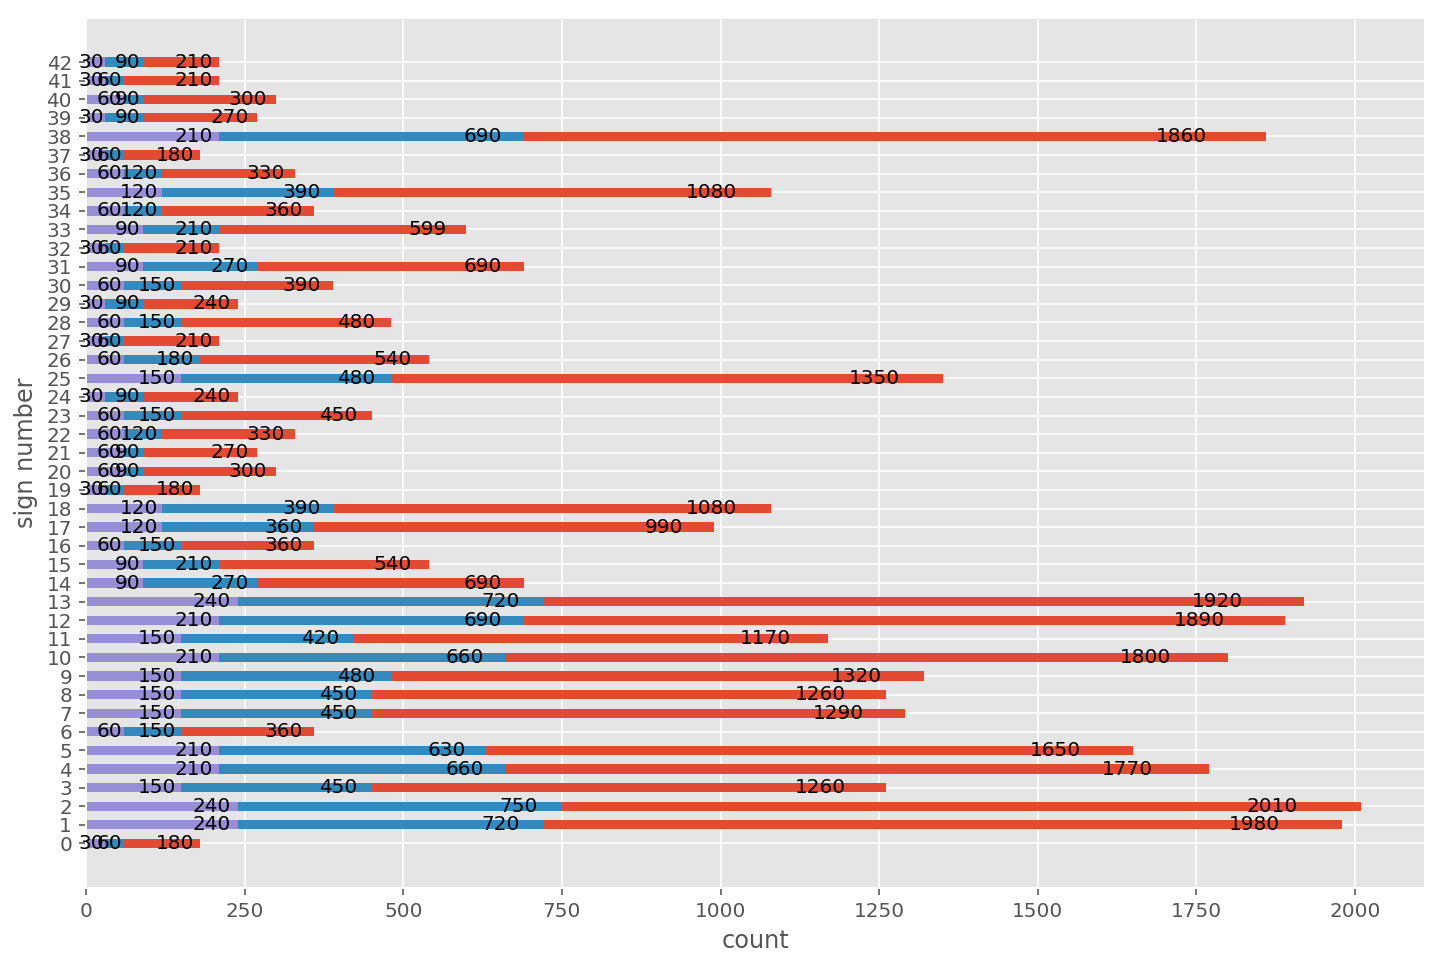

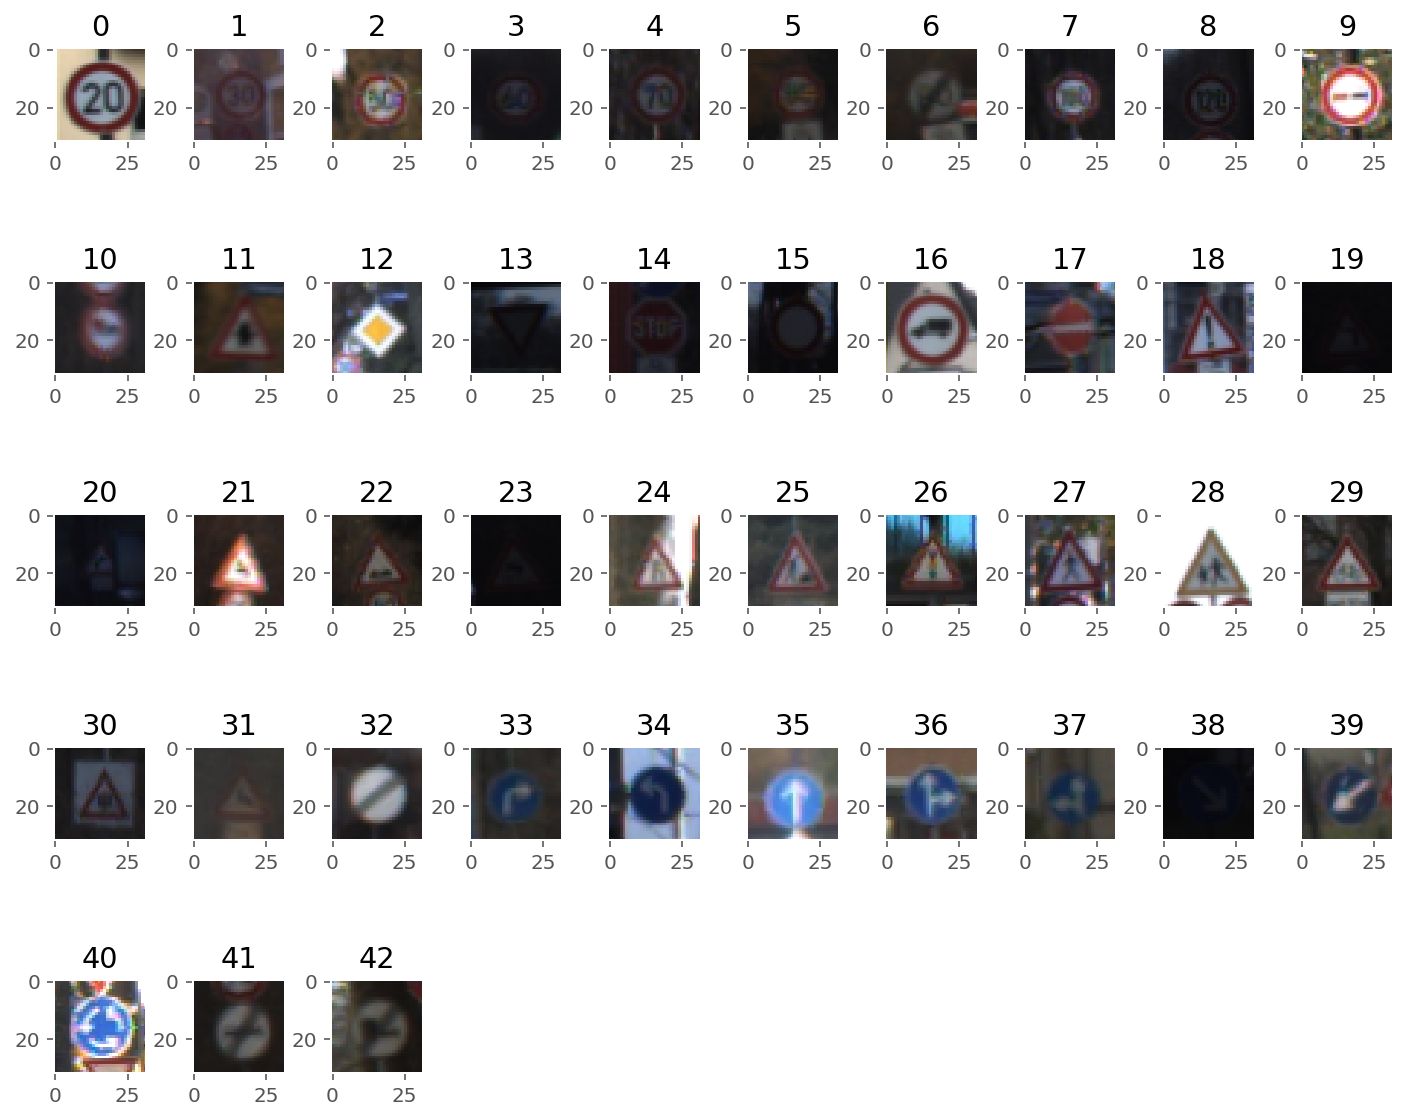

In [447]:
### Data exploration visualization code
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc, style

import random as rd


def dataset_hist(y_data_list):
    style.use('ggplot')
    fig = plt.figure(figsize=(12, 8))  
    
    for y_data in y_data_list:
        bincount = np.bincount(y_data)
        ypos = np.arange(len(bincount))
        rects = plt.barh(ypos, bincount, align='center', height=0.5)
        for i, rect in enumerate(rects):
            plt.text(0.95 * rect.get_width(), rect.get_y() + rect.get_height() / 2.0, 
                    str(bincount[i]), ha='right', va='center')
    plt.yticks(ypos, ypos)
    plt.xlabel('count')
    plt.ylabel('sign number')


    
def visualize(X_data, y_data):
    sign = pd.read_csv('./data/signnames.csv', index_col=0)
    yX_series = pd.Series(range(X_data.shape[0]), index=y_data)
    
    fig = plt.figure(figsize=(12,10))
    fig.subplots_adjust(wspace=0.5, hspace=0.5)
    for i in range(n_classes):
        axes = fig.add_subplot(5,10,i+1)
        axes.grid(b=False)
        axes.set_title(str(i)) # + ': ' + sign['SignName'].ix[i])
        x = yX_series[~yX_series.index.duplicated()][i]
        if (X_data[x].shape[2] == 1):
            gray_img = np.reshape(X_data[x], (32, 32))
            axes.imshow(gray_img, cmap='gray')
        else:
            axes.imshow(X_data[x])


            
dataset_hist([y_train, y_test, y_valid])
visualize(X_train, y_train)


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [448]:

def transform_image(img, ang_range, shear_range, trans_range):

    ang_rot = np.random.uniform(ang_range) - ang_range / 2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    tr_x = trans_range*np.random.uniform() - trans_range / 2
    tr_y = trans_range*np.random.uniform() - trans_range / 2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])


    pts1 = np.float32([[5,5],[20,5],[5,20]])
    pt1 = 5 + shear_range*np.random.uniform() - shear_range / 2
    pt2 = 20 + shear_range*np.random.uniform() - shear_range / 2


    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])
    shear_M = cv2.getAffineTransform(pts1,pts2)

    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))

    return img



def up_sampling(X_data, y_data):
    XA_data = np.copy(X_data)
    ya_data = np.copy(y_data)

    bin_count = np.bincount(y_data)
    bin_mean = np.mean(bin_count)
    bin_max = np.max(bin_count)

    for i in range(n_classes):
        sign_idx = np.nonzero(y_data == i)
        gen_count = np.int(bin_mean - len(sign_idx[0]))
        print('sign=',i, 'len(sign_idx)=', len(sign_idx[0]), 'gen_count=', gen_count)

        for j in range(gen_count):
            sign_idx_rand = np.random.randint(0, high=len(sign_idx[0]))
            sign = sign_idx[0][sign_idx_rand]
            img = transform_image(X_data[sign],20,10,5,brightness=1)

            ya_data = np.append(ya_data, y_data[sign])
            XA_data = np.append(XA_data, np.reshape(img, (1, 32,32,3)), axis=0)
    return (XA_data, ya_data)


def down_sampling(X_data, y_data):

    XA_data = []
    ya_data = []

    bin_count = np.bincount(y_data)
    bin_min = np.int(np.min(bin_count))

    for i in range(n_classes):
        sign_idx = np.nonzero(y_data == i)[0]
        for j in range(bin_min):
            ya_data.append(y_data[sign_idx[j]])
            XA_data.append(X_data[sign_idx[j]])
            
    return (np.array(XA_data), np.array(ya_data))


def data_augment(X_data, y_data):
    print('before=', X_data.shape, y_data.shape)
    #X_data, y_data = down_sampling(X_data, y_data)
    print('after=', X_data.shape, y_data.shape)
    return X_data, y_data

XA_train, ya_train = data_augment(X_train, y_train)

#dataset_hist([ya_train])

before= (34799, 32, 32, 3) (34799,)
after= (34799, 32, 32, 3) (34799,)


In [449]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle
import cv2



def equalizeHist(data):
    XX_data = []
    print(data[0].shape)
    for i in range(data.shape[0]):
        yuv = cv2.cvtColor(data[i], cv2.COLOR_RGB2YUV)

        hist = cv2.equalizeHist(yuv[:,:,0])
        
        #create a CLAHE object (Arguments are optional).
        #clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        #hist = clahe.apply(y_yuv)
        
        yuv[:,:,0] = hist
        rgb = cv2.cvtColor(yuv, cv2.COLOR_YUV2RGB)
        
        #gray = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)
        #img_d = np.reshape(gray, (32, 32, 1))
        #print(hist.shape)
        XX_data.append(rgb)

        #data[i][:,:,1:] = 0
    
    return np.asarray(XX_data)


def gray(data):
    XX_data = []
    for i in range(data.shape[0]):
        gray = cv2.cvtColor(data[i], cv2.COLOR_RGB2GRAY)
        #np.expand_dims(X_train, axis = 4)
        gray = np.reshape(gray, (gray.shape[0], gray.shape[1], 1))
        XX_data.append(gray)
    return np.array(XX_data)

def normalize(data):
    #data = data - np.mean(data, axis=0)
    #data = data / np.std(data, axis=0)
    XX_data = data.astype(np.float32) / 255.0
    return XX_data


def preprocessing(X_data):
    #X_data = equalizeHist(X_data)
    X_data = normalize(X_data)
    return X_data

XP_train = preprocessing(XA_train)
XP_valid = preprocessing(X_valid)
#XP_test = preprocessing(X_test)
#visualize(XP_train, ya_train)


### Model Architecture

In [450]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
from tensorflow.contrib.layers import flatten

x = tf.placeholder(tf.float32, (None, 32, 32, 3), name='x')
y = tf.placeholder(tf.int32, (None), name='y')
keep_prob = tf.placeholder(tf.float32, name='keep_prob')
one_hot_y = tf.one_hot(y, n_classes)


mu = 0
sigma = 0.01

    
# Layer 1
conv1_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 3, 70), mean = mu, stddev = sigma))
conv1_b = tf.Variable(0., [70])
conv1_c = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
conv1_a = tf.nn.relu(conv1_c, name='conv1')

# Pooling.
conv1_p = tf.nn.max_pool(conv1_a, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')


# Layer 2
conv2_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 70, 70), mean = mu, stddev = sigma))
conv2_b = tf.Variable(0., [70])
conv2_c = tf.nn.conv2d(conv1_p, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
conv2_a = tf.nn.relu(conv2_c, name='conv2')

# Pooling
conv2_p = tf.nn.max_pool(conv2_a, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')



# Flatten
fc0   = flatten(conv2_p)

fc1_W = tf.Variable(tf.truncated_normal(shape=(2520, 1000), mean = mu, stddev = sigma))
fc1_b = tf.Variable(0., [1000])
fc1_m = tf.matmul(fc0, fc1_W) + fc1_b
fc1_a = tf.nn.relu(fc1_m)
fc1_d = tf.nn.dropout(fc1_a, keep_prob)

fc2_W = tf.Variable(tf.truncated_normal(shape=(1000, 1000), mean = mu, stddev = sigma))
fc2_b = tf.Variable(0., [1000])
fc2_m = tf.matmul(fc1_d, fc2_W) + fc2_b
fc2_a = tf.nn.relu(fc2_m)
fc2_d = tf.nn.dropout(fc2_a, keep_prob)

fc3_W = tf.Variable(tf.truncated_normal(shape=(1000, 43), mean = mu, stddev = sigma))
fc3_b = tf.Variable(0., [43])
logits = tf.matmul(fc2_d, fc3_W) + fc3_b
    


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

Training... 

EPOCH 1 ...
Training Accuracy = 0.438
Validation Accuracy = 0.388
EPOCH 2 ...
Training Accuracy = 0.754
Validation Accuracy = 0.689
EPOCH 3 ...
Training Accuracy = 0.928
Validation Accuracy = 0.863
EPOCH 4 ...
Training Accuracy = 0.974
Validation Accuracy = 0.911
EPOCH 5 ...
Training Accuracy = 0.987
Validation Accuracy = 0.930
EPOCH 6 ...
Training Accuracy = 0.992
Validation Accuracy = 0.939
EPOCH 7 ...
Training Accuracy = 0.995
Validation Accuracy = 0.951
EPOCH 8 ...
Training Accuracy = 0.997
Validation Accuracy = 0.958
EPOCH 9 ...
Training Accuracy = 0.997
Validation Accuracy = 0.951
EPOCH 10 ...
Training Accuracy = 0.998
Validation Accuracy = 0.949
Model saved 0:14:36.293610


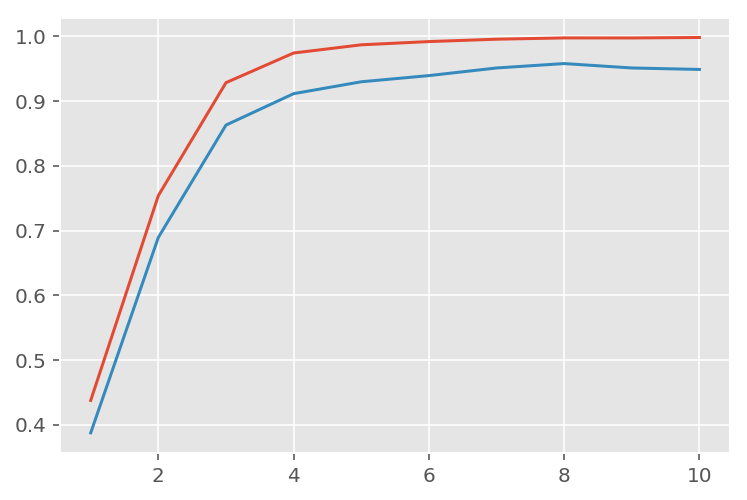

In [452]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from datetime import datetime

EPOCHS = 10
BATCH_SIZE = 128
RATE = 0.0009 #0.00005 # full
#RATE = 0.005 # min
    
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = RATE)
training_operation = optimizer.minimize(loss_operation)


correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run((accuracy_operation), feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
        #loss += loss
    return total_accuracy / num_examples


train_acc = []
valid_acc = []
valid_loss = []

#fig = plt.figure(figsize=(8, 8), dpi=100)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(XP_train)
    
    starttime = datetime.now()
    print("Training... ")
    print()

    for i in range(EPOCHS):
        print("EPOCH {} ...".format(i+1))
        
        XS_train, ys_train = shuffle(XP_train, ya_train)
        
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = XS_train[offset:end], ys_train[offset:end]
            t = sess.run((training_operation), feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})


        training_accuracy = evaluate(XP_train, ya_train)
        train_acc.append(training_accuracy)
        print("Training Accuracy = {:.3f}".format(training_accuracy))
            
        validation_accuracy = evaluate(XP_valid, y_valid)
        valid_acc.append(validation_accuracy)
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        
        #valid_loss.append(validation_loss)
        #fig.canvas.draw()
        
        
    saver = tf.train.Saver()   
    saver.save(sess, './lenet')
    print("Model saved", datetime.now() - starttime)
    plt.plot(range(1, len(train_acc)+1), train_acc)
    plt.plot(range(1, len(valid_acc)+1), valid_acc)
    
    

In [453]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(XP_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))  

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.907


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

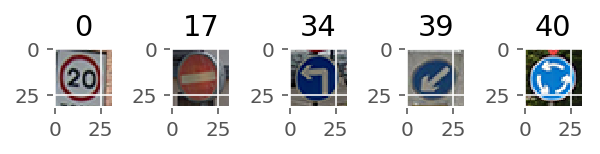

In [454]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import os
test_image_dir = "examples/"
X_new = []
y_new = [0, 17, 34, 39, 40]

fig = plt.figure(figsize=(10,25))
fig.subplots_adjust(wspace=1.)
i = 0
for image in ['0.png', '17.png', '34.png', '39.png', '40.png']:
    img = plt.imread(test_image_dir + image)[:,:,:3]
    X_new.append(img)
    ax = fig.add_subplot(1,10,i+1)
    ax.imshow(img)
    

    ax.set_title(y_new[i])
    i += 1


X_new = np.array(X_new)



### Predict the Sign Type for Each Image

In [455]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

XP_new = X_new
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    argmax = tf.argmax(logits, 1)
    argmax_v, logits_v = sess.run((argmax, logits), feed_dict={x: XP_new, keep_prob: 1})

print('prediction=', argmax_v)
print('y_new=', y_new)
    
    

INFO:tensorflow:Restoring parameters from ./lenet
prediction= [ 0 17 34 39 40]
y_new= [0, 17, 34, 39, 40]


### Analyze Performance

In [456]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(XP_new, y_new)
    print("New Test Accuracy = {:.3f}".format(test_accuracy)) 

INFO:tensorflow:Restoring parameters from ./lenet
New Test Accuracy = 1.000


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k)

In [457]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    top_k = tf.nn.top_k(tf.nn.softmax(logits), k=5)
    top_k_values, top_k_indices = sess.run(top_k, feed_dict={x: XP_new, y: y_new, keep_prob: 1})


#fig = plt.figure(figsize=(20,10))
#plt.grid(b=False)
#fig.subplots_adjust(wspace=0.5, hspace=0.5)

for image_num in range(len(y_new)):
    print(top_k_indices[image_num], top_k_values[image_num])
        
    #ax_img = fig.add_subplot(10,2,image_num*2+1)
    #ax_img.imshow(XP_new[image_num])
    #ax_img.set_title(y_new[image_num])
    
    #ax_top_k = fig.add_subplot(10,2,image_num*2+2)
    #rects = ax_top_k.barh([5,4,3,2,1], top_k_values[image_num], align='center', height=0.5)
    #ax_top_k.set_yticklabels(np.append(0, top_k_indices[image_num][::-1]))
    #print([0]+top_k_indices[image_num][::-1])
    
    #for i, rect in enumerate(rects):
    #    ax_top_k.text(0.95 * rect.get_width(), rect.get_y() + rect.get_height() / 2.0, 
    #            str(top_k_values[image_num][i]), ha='right', va='center')


INFO:tensorflow:Restoring parameters from ./lenet
[ 0  1  4  8 14] [ 0.65770763  0.33023158  0.0074329   0.0027483   0.00128476]
[17 14 29 10  0] [  9.94991243e-01   5.00819273e-03   2.42828946e-07   2.01832634e-07
   5.64148266e-08]
[34 35 38 23 41] [  1.00000000e+00   1.34649770e-14   6.26374300e-15   8.53531000e-21
   1.15679043e-22]
[39 33 37 26 34] [  1.00000000e+00   8.22182877e-11   2.35420884e-12   3.60811201e-14
   2.49422401e-17]
[40 42  6 41  5] [  1.00000000e+00   3.19023379e-17   5.53855323e-18   3.20482050e-18
   2.53751508e-18]


---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


INFO:tensorflow:Restoring parameters from ./lenet


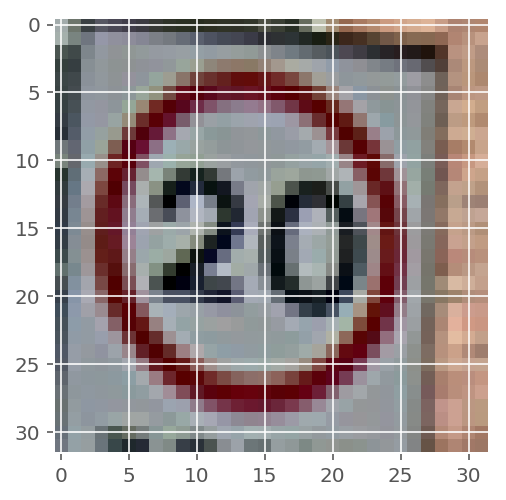

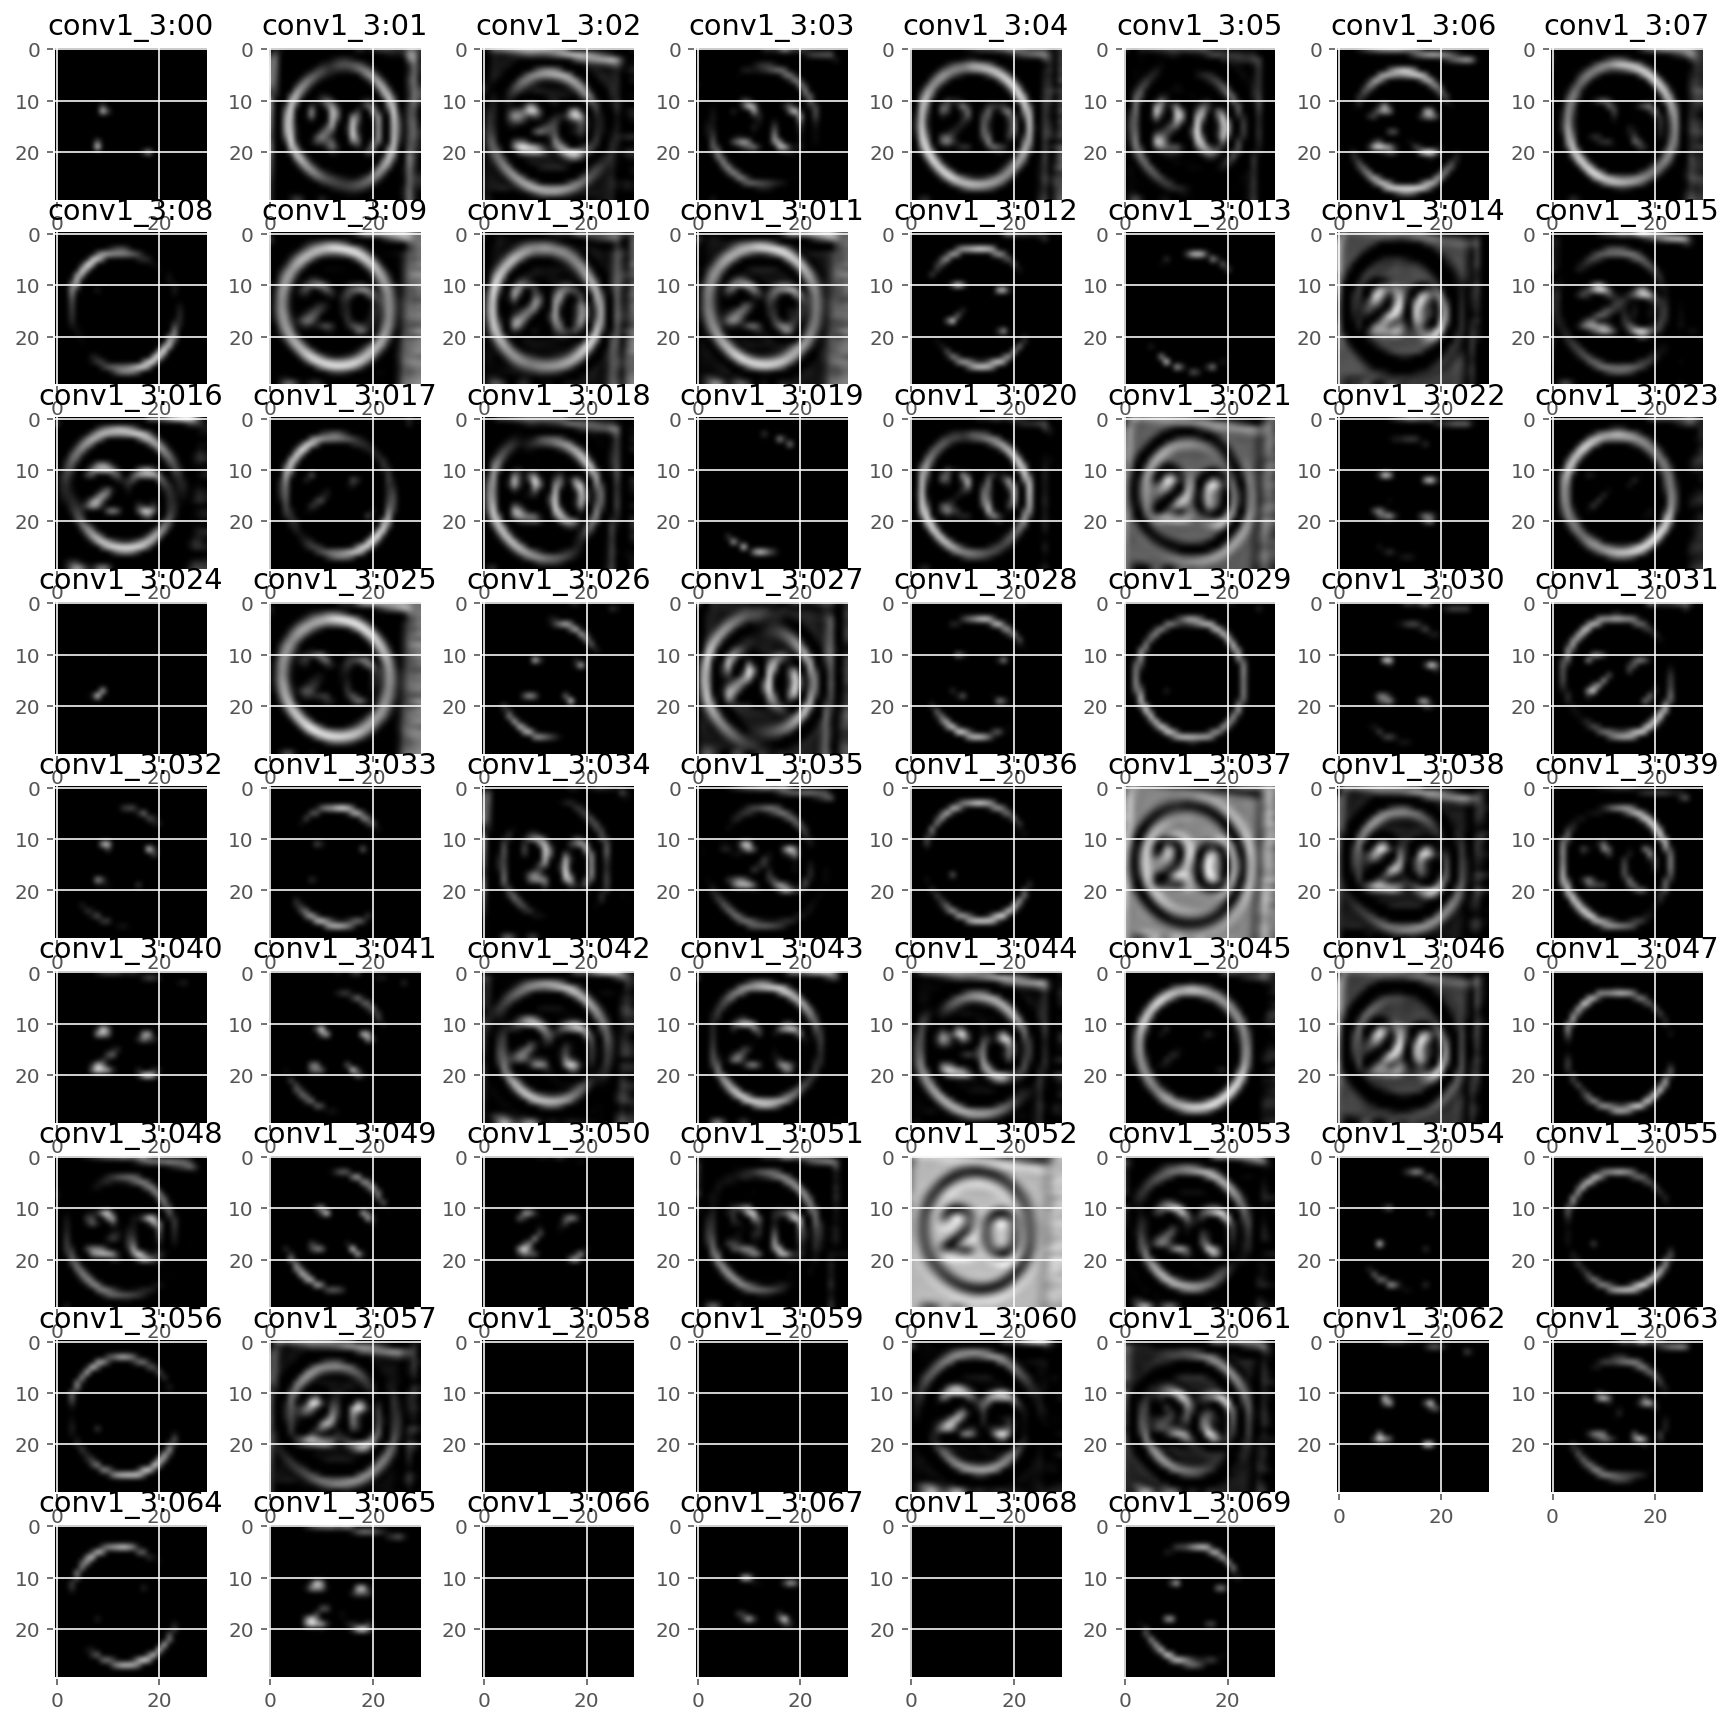

INFO:tensorflow:Restoring parameters from ./lenet


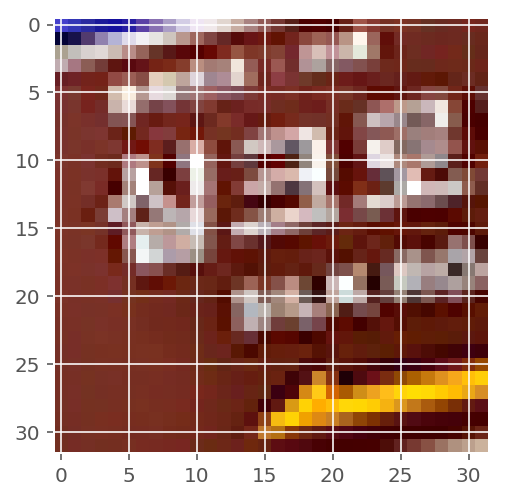

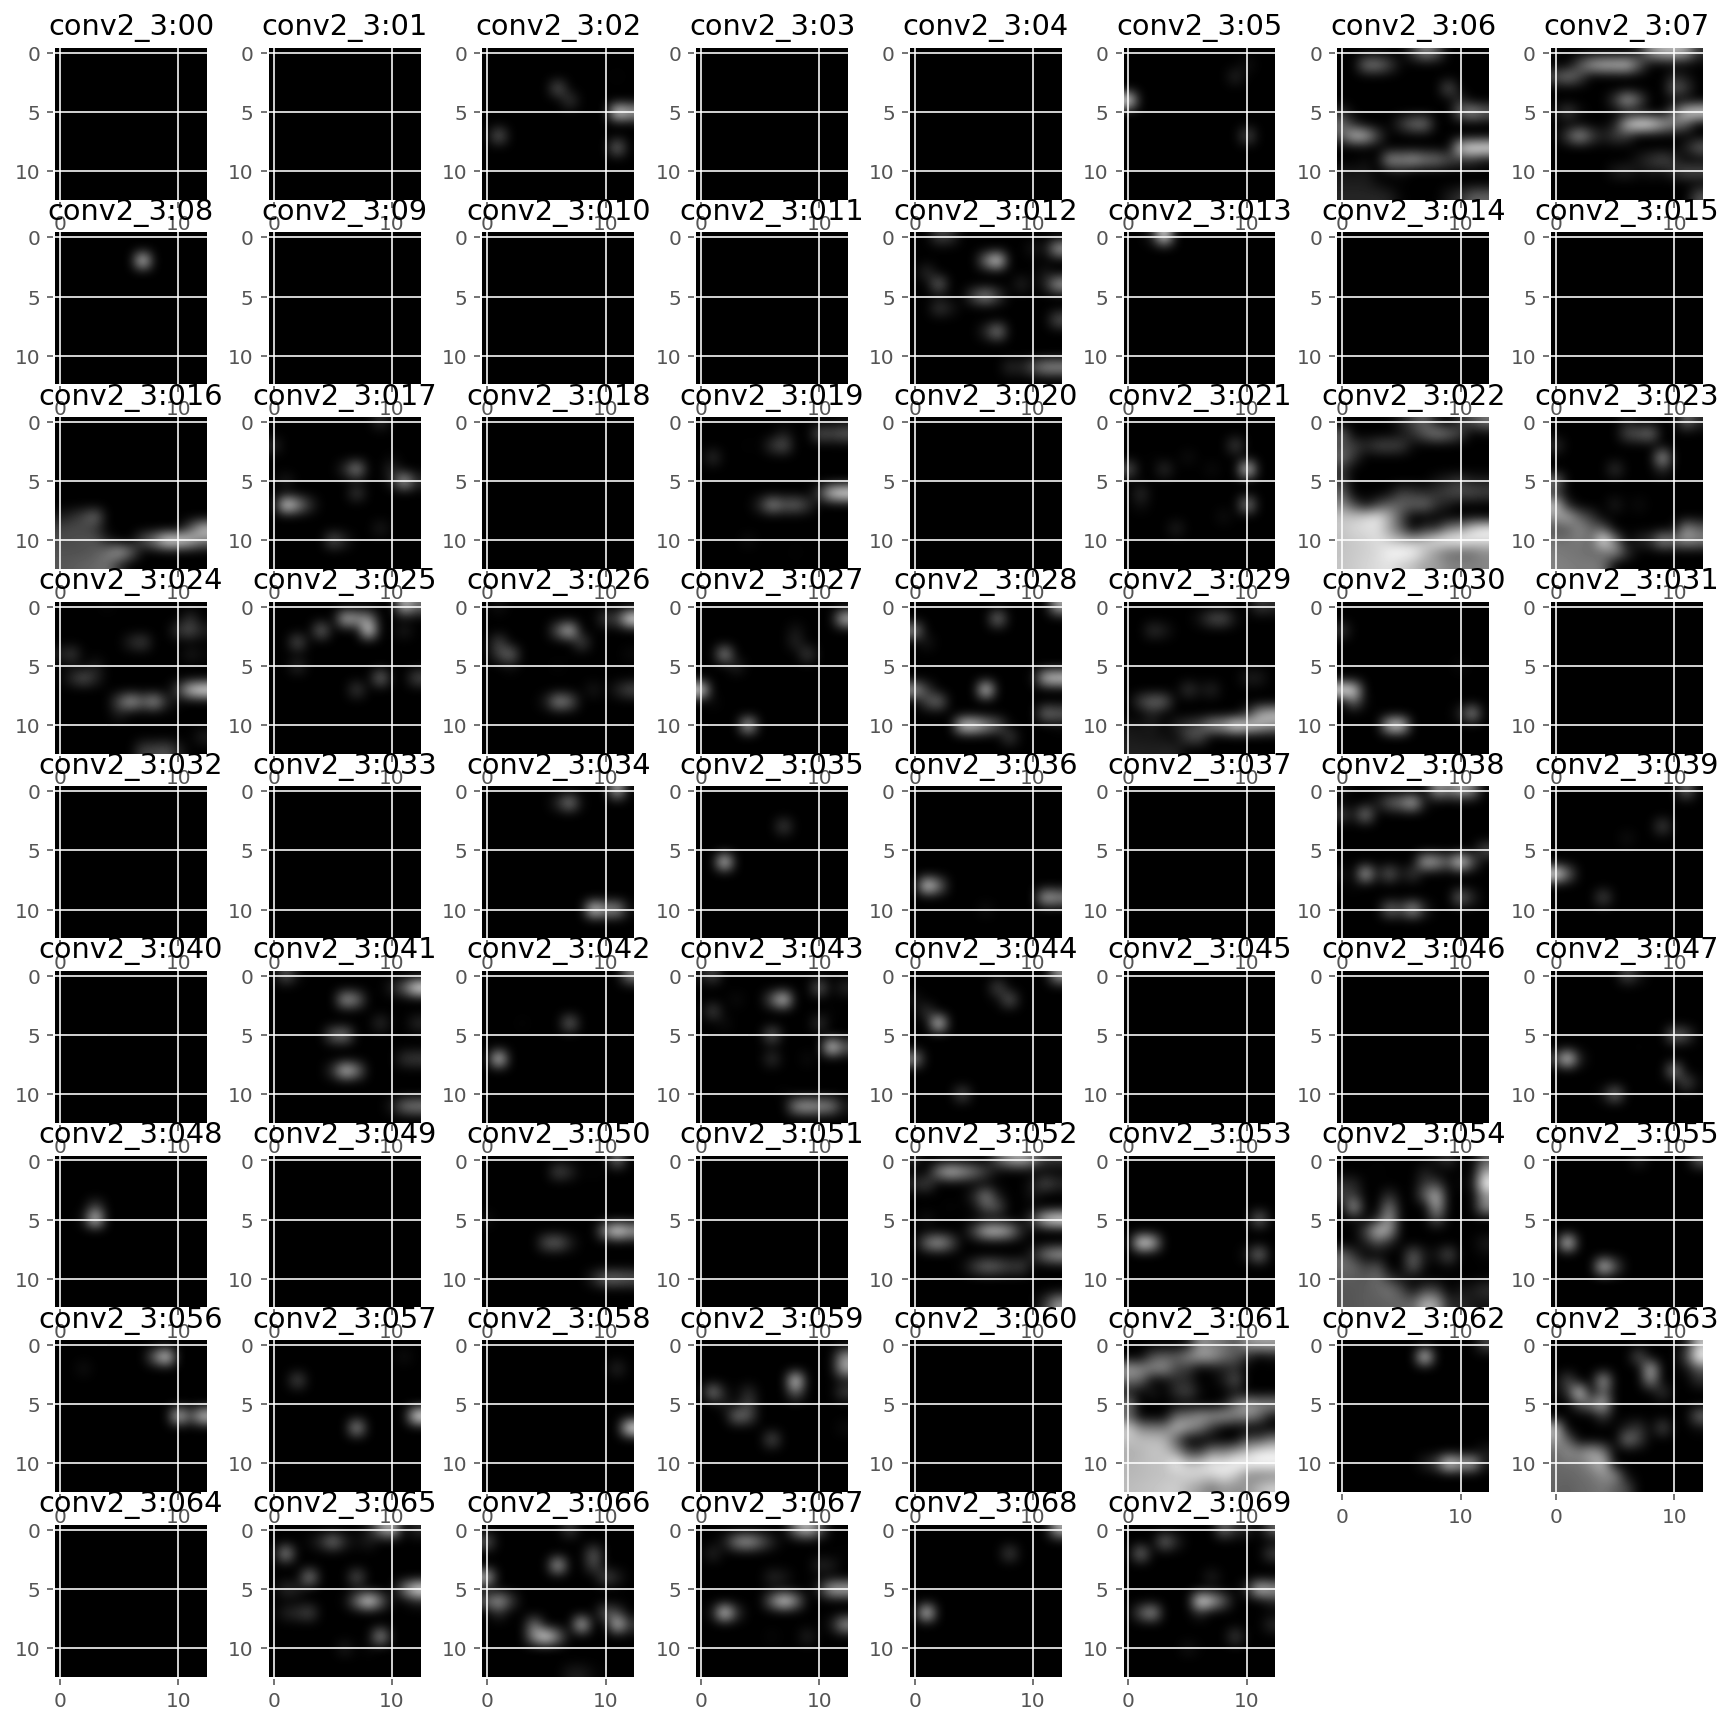

In [458]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.


def featuremap(image_input, tf_activation):
  
    with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))
        activation = sess.run(tf_activation, feed_dict={x : image_input.reshape(-1, 32,32,3)})
    
    featuremaps = activation.shape[3]
    plt.figure(figsize=(15,15))
    plt.grid(b=False)
    for fmap in range(featuremaps):
        plt.subplot(np.ceil(featuremaps/8),8, fmap+1) # sets the number of feature maps to show on each row and column
        plt.title(tf_activation.name + str(fmap)) # displays the feature map number    
        plt.imshow(activation[0,:,:, fmap], interpolation="bicubic", cmap="gray")
        
    plt.show()
        
plt.figure()
plt.imshow(XP_new[0])
#featuremap(XP_new[0], conv1_c)          
featuremap(XP_new[0], conv1_a)    
#featuremap(XP_new[0], conv2_c)    
#featuremap(XP_new[0], conv2_a) 

feature_test = plt.imread(test_image_dir + 'feature_test.png')
plt.figure()
plt.imshow(feature_test)
featuremap(feature_test, conv2_a)


### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

I can see that the feature map of #sign 0 has activated the circle and "20". So it seems to have learned to extract that features. When the network has given no sign image, it does not see anything special.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 